<a href="https://colab.research.google.com/github/charle0911/2nd-ML100Days/blob/master/homework/Day_042_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

# Ans1


In [0]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [0]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型(原)
clf = DecisionTreeClassifier()

# 建立模型(更動)
clf2 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=2)

# 訓練模型
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

In [0]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
acc2 = metrics.accuracy_score(y_test, y_pred2)
print("Acuuracy: ", acc2)

Acuuracy:  0.9736842105263158
Acuuracy:  0.9736842105263158


In [0]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
print("Feature importance: ", clf.feature_importances_)
print("Feature importance: ", clf2.feature_importances_)

Feature importance:  [0.01796599 0.         0.05992368 0.92211033]
Feature importance:  [0. 0. 0. 1.]


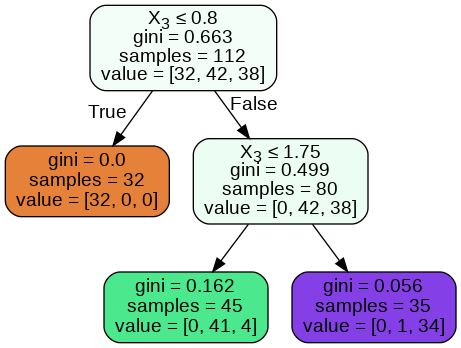

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Ans2


In [0]:
# 讀取波士頓資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

# 建立模型(原)
clfB = DecisionTreeRegressor()

# 建立模型(更動)
clfB2 = DecisionTreeRegressor(min_samples_split=2,min_samples_leaf=1,max_depth=5)

# 訓練模型
clfB.fit(x_train, y_train)
clfB2.fit(x_train, y_train)

# 預測測試集
y_pred = clfB.predict(x_test)
y_pred2 = clfB2.predict(x_test)

In [0]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [0]:
print("Feature importance: ", clfB.feature_importances_)
print("Feature importance: ", clfB2.feature_importances_)

Feature importance:  [6.45939204e-02 1.69563221e-03 1.15973691e-02 8.00844838e-05
 2.88244454e-02 5.41439990e-01 2.08978074e-02 6.74848406e-02
 5.77490092e-04 1.02611108e-02 2.05042700e-02 1.01973199e-02
 2.21845719e-01]
Feature importance:  [0.06456084 0.         0.00552004 0.01041665 0.02428222 0.58671076
 0.00148896 0.05641972 0.         0.         0.01488899 0.00310621
 0.23260561]


In [0]:

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred2))

Mean squared error: 27.24
Mean squared error: 27.35
